# Interpreting ResNet Model With Integrated Gradients

This notebook loads the pretrained ResNet model given by [PaddleClas](https://github.com/PaddlePaddle/PaddleClas/tree/release/2.0) and performs image classification on selected images. 

Interpretations of the predictions are generated and visualized using Integrated Gradients algorithm, specifically the `IntGradCVInterpreter` class.

In [1]:
import paddle
import interpretdl as it
!ln -s ../tutorials/assets assets

ln: assets/assets: File exists


If you have't done so, please first download the pretrained ResNet50 model by runnig the cell below or directly from [this link](https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet50_pretrained.pdparams). 
More pretrained models can be found in [PaddleClas Model Zoo](https://github.com/PaddlePaddle/PaddleClas/tree/e93711c43512a7ebcec07a0438aa87565df81084#Model_zoo_overview).

In [2]:
# load from paddle.vision
from paddle.vision.models import resnet50
paddle_model = resnet50(pretrained=True)

Initialize the `IntGradCVInterpreter`. 

In [1]:
import torch
import interpretdl as it
from torchvision.models import resnet50
deep_model = resnet50(pretrained=True)
ig = it.IntGradCVInterpreter(deep_model, use_cuda='pt')

/Users/lixuhong/miniconda3/envs/pt/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PyTorch is not compiled with CUDA support. Change to CPU version now.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:15<00:00,  1.32it/s]


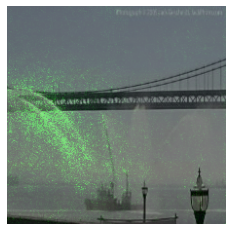

In [2]:
img_path = 'assets/fireboat.png'
gradients = ig.interpret(
    img_path,
    labels=None,
    baselines='random',
    steps=50,
    num_random_trials=2,
    visual=True,
    save_path=None)

In [4]:
ig = it.IntGradCVInterpreter(paddle_model, device='gpu:0', use_cuda='pp')

Before interpreting the image, we first take a look at the original image.

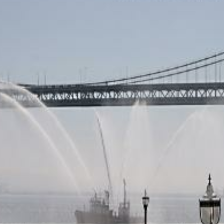

In [5]:
from PIL import Image

from interpretdl.data_processor.readers import read_image

img_path = 'assets/fireboat.png'
x = Image.fromarray(read_image(img_path)[0])
x

Then, let Integrated Gradients method help us `interpret` the image with respect to the predicted label. We choose to choose random baselines and perform 10 random trials. Gradients are overlayed with the original image.

In [6]:
gradients = ig.interpret(
    img_path,
    labels=None,
    baselines='random',
    steps=50,
    num_random_trials=10,
    visual=True,
    save_path=None)

Paddle is not installed with GPU support. Change to CPU version now.


/Users/lixuhong/miniconda3/envs/pp2/lib/python3.7/site-packages/paddle/fluid/dygraph/varbase_patch_methods.py:523: UserWarning: 
tensor.grad will return the tensor value of the gradient. This is an incompatible upgrade for tensor.grad API.  It's return type changes from numpy.ndarray in version 2.0 to paddle.Tensor in version 2.1.0.  If you want to get the numpy value of the gradient, you can use :code:`x.grad.numpy()` 
  warnings.warn(warning_msg)
  3%|██▉                                                                                               | 15/500 [00:12<06:47,  1.19it/s]


KeyboardInterrupt: 

Another choice for visualization is in grayscale:

Note that `IntGradCVInterpreter` also supports multiple images as inputs. They can be either processed images or a list of image filepaths. Feel free to play around with it!